In [184]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

df = pd.read_csv('Exercise control chart when the parameters are unknown.csv', index_col=0)

In [185]:
df.dtypes

observation 1    float64
observation 2    float64
observation 3    float64
observation 4    float64
dtype: object

In [186]:
df['row mean'] = df.mean(axis=1)

In [187]:
df['range'] = df.max(axis=1) - df.min(axis=1)

In [188]:
df

,observation 1,observation 2,observation 3,observation 4,row mean,range
Sample num,,,,,,
1,55.0,55.0,54.5,54.5,54.750,0.5
2,54.0,54.0,54.0,55.0,54.250,1.0
3,52.5,53.0,53.0,53.5,53.000,1.0
4,52.5,53.0,53.0,53.5,53.000,1.0
5,54.0,53.5,53.0,53.0,53.375,1.0
6,54.0,53.0,55.0,54.5,54.125,2.0
7,55.0,55.0,54.0,54.0,54.500,1.0
8,53.0,53.5,54.0,53.0,53.375,1.0
9,54.5,54.0,54.0,54.0,54.125,0.5


In [189]:
dfavg_of_avg = df['row mean'].mean()
CL_avg = avg_of_avg
avg_of_avg

53.725

In [190]:
range_avg = df['range'].mean()
CL_range = range_avg
CL_range

1.04

In [191]:
# For N=4:
A2 = 0.729     #From coefficients table for control charts
D4 = 2.282     #From coefficients table for control charts
D3 = 0         #From coefficients table for control charts

UCL_AVG = round(CL_avg + A2*CL_range,3)
LCL_AVG = round(CL_avg - A2*CL_range,3)

STD = round((UCL_AVG - CL_avg)/3,3)

UWL_AVG = round(CL_avg + (2*STD),3)
LWL_AVG = round(CL_avg - (2*STD),3)


UCL_R = round(D4*CL_range,3)
LCL_R = round(D3*CL_range,3)

# Range control chart

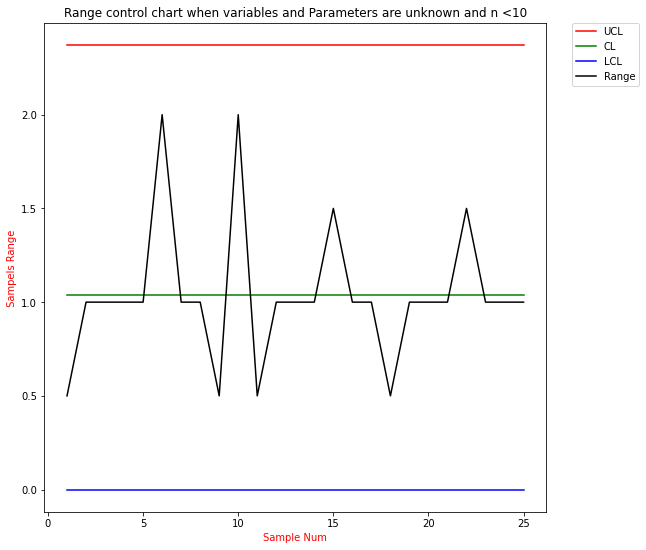

In [192]:
plt.plot( df.index.values , (np.ones(df.index.max())*UCL_R) ,  label = 'UCL' , color = 'r')


plt.plot( df.index.values , (np.ones(df.index.max())*CL_range) ,   label = 'CL', color = 'g')

plt.plot( df.index.values , (np.ones(df.index.max())*LCL_R) ,  label = 'LCL',  color = 'b')

plt.plot( df.index.values , (df['range']) ,    label = 'Range', color = 'k')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel(' Sampels Range ', color = 'r' )
plt.title('Range control chart when variables and Parameters are unknown and n <10')
plt.xlabel( 'Sample Num', color = 'r' )


plt.show()

# Averages control chart

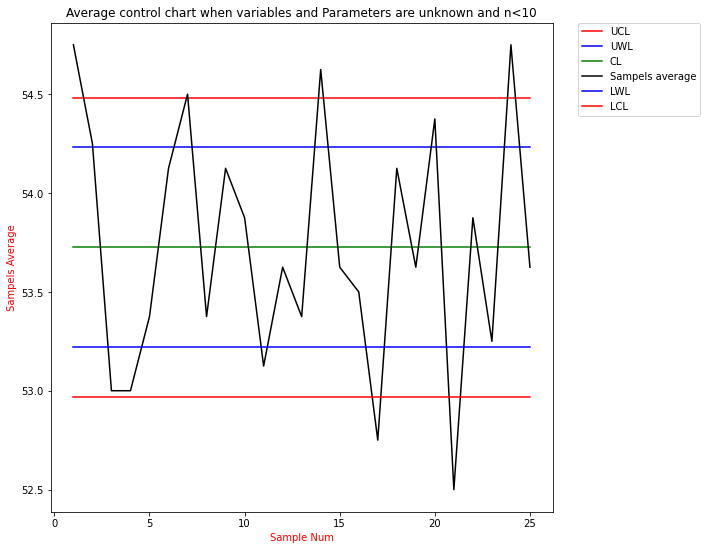

In [194]:
plt.plot( df.index.values , (np.ones(df.index.max())*UCL_AVG) ,  label = 'UCL' , color = 'r')
plt.plot( df.index.values , (np.ones(df.index.max())*UWL_AVG) ,  label = 'UWL',  color = 'b' )


plt.plot( df.index.values , (np.ones(df.index.max())*CL_avg) ,   label = 'CL', color = 'g')
plt.plot( df.index.values , (df['row mean']) ,    label = 'Sampels average', color = 'k')


plt.plot( df.index.values , (np.ones(df.index.max())*LWL_AVG) ,  label = 'LWL' , color = 'b')
plt.plot( df.index.values , (np.ones(df.index.max())*LCL_AVG) ,  label = 'LCL' , color = 'r')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel(' Sampels Average ', color = 'r' )
plt.title('Average control chart when variables and Parameters are unknown and n<10')
plt.xlabel( 'Sample Num', color = 'r' )


plt.show()
